#### Proyecto Final de Estadistica con Python

**Estudiante Richard Douglas Grijalba**

**Curso : Fudamentos de Probabilidad con Python**

**Especialidad Ciencia Datos Python.  Grow Up - Modalidad virtual**

*Tomar un problema actual real o usar un dataset que permita aplicar un análisis estadístico que se aprendió en el curso.*
*Se debe aplicar los tres grandes temas que se vieron en los cursos, cada proyecto debe tener su interpretación de los resultados, se debe seleccionar como mínimo 2 por tema principical y aplicarlo al caso en estudio*

Los temas principales son:

**Estadistica Descriptiva**

**Probabilidad**

**Estadistica Inferencial**


## I - Estadistica Descriptiva

La estadística descriptiva es una disciplina que se encarga de recoger, almacenar, ordenar, realizar tablas o gráficos y calcular parámetros básicos sobre el conjunto de datos.

Por lo tanto a continuación se procederá a cargar un dataset (df) y se generara una descripción general del mismo y sus respectivas variables (columnas) y observaciones (filas), por  medio de la aplicación de medidas de tendencia central y gráficas.

In [96]:
# importar las diferente librerias que pueden ser necesarias para el desarrollo del análisis

import re
import pandas as pd
import numpy as np
#from mlutils import dataset, connector
import scipy.stats as ss
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab as py
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Rdouglas\\Fundamentos Probabilidad Python'

In [12]:
# cargar el datset 
df = pd.read_csv('C:\\Users\\Rdouglas\\Documents\\Python Scripts\\M_data_final_Probabilidad\\Churn_Modelling.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [14]:
df = df.drop(['RowNumber'], axis=1) # se elimina la columna de Rownumber 

In [15]:
df.head(3) # nuevo df sin la columna de RowNumber

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


#### Describir el dataset

el dataset se tomó de kaggle.com el mismo corresponde a **Bank Customer Churn Prediction** reune una serie de información de clientes bancarios tales como : género,edad, pais (geography), informacion crediticia, salario estimado. Se espera que este datset permita desarrollar lo necesario para la finalidad de esta trabajo final.


https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

In [16]:
df.info() # se genera una exploracion de los datos para observar cuales con tipo numerio y cuales no

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [17]:
df.shape  # el dataset se conforma de 10000 observaciones y un total de 13 variables (columnas)

(10000, 13)

In [18]:
df.columns  # el nombre de las columnas son los siguientes

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
df.describe().T  # se procede a generar una descripción rápida del dataset
                 # en el cual se puede observar los valores de promedio, desviacion estandar, minimos, maximos y percentiles

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


**Age** el valor mean es de 3.892, con una desviacion estandar de 10.48

In [20]:
# revisar si existen valores nulos
df.isna().sum()    # según lo visto no tenemos valores nulos 

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
df.groupby('Surname').size()

Surname
Abazu       2
Abbie       1
Abbott      4
Abdullah    1
Abdulov     2
           ..
Zubarev     3
Zubareva    1
Zuev        1
Zuyev       2
Zuyeva      2
Length: 2932, dtype: int64

**Caracteristica Geography** Cómo está distribuida la caracteristica?

In [22]:
df.groupby('Geography').size()

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

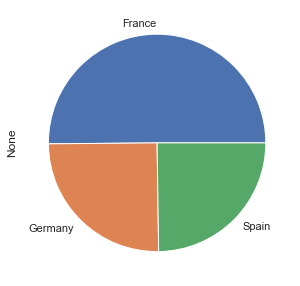

In [41]:
df.groupby('Geography').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

*del grafico anterior se observa que el lugar geography que más aparece corresponde a Francia, y los demás Alemania y España*

**Caracteristica Age** Cómo está distribuida la caracteristica?

In [23]:
df.groupby('Gender').size()

Gender
Female    4543
Male      5457
dtype: int64

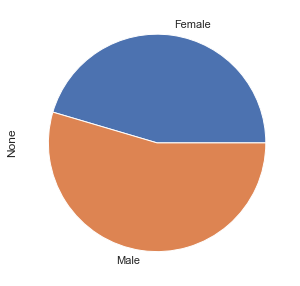

In [40]:
df.groupby('Gender').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

*del grafico anterior se observa que la mayoria de los clientes corresponde a hombres*

In [59]:
pd.crosstab(df.Age,df.Gender,    # contando con los nulos
           margins=True,
           margins_name='Total', dropna=False)

Gender,Female,Male,Total
Age,,,
18,4,18,22
19,9,18,27
20,13,27,40
21,33,20,53
22,42,42,84
...,...,...,...
84,1,1,2
85,1,0,1
88,0,1,1


**Ahora una comparativa de los Clientes según el Género, Edad y el Salario estimado**

In [70]:
df1 = df.copy()

In [71]:
df1['age_range'] = (df['Age']//5)*5

In [73]:
round(df1.pivot_table( 'EstimatedSalary' ,index= 'age_range', columns= 'Gender', aggfunc= 'mean',fill_value=0),2)

Gender,Female,Male
age_range,,
15,98418.84,89767.45
20,102513.51,106314.39
25,99588.79,100256.22
30,103812.05,97429.05
35,95267.99,98795.54
40,103559.30,101747.38
45,106429.81,104026.29
50,97942.11,102124.56
55,94195.41,91169.31


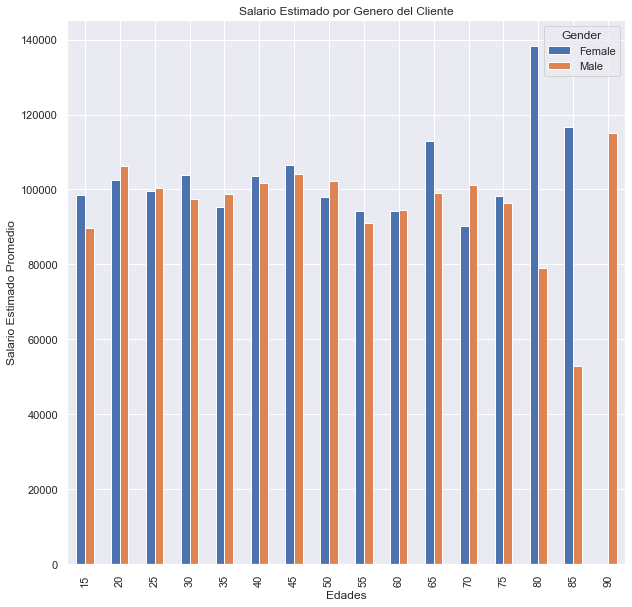

In [79]:
round(df1.pivot_table( 'EstimatedSalary' ,index= 'age_range', columns= 'Gender', aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar' ) 
sns.set(rc={'figure.figsize':(14,14)})
plt.title("Salario Estimado por Genero del Cliente")
plt.ylabel("Salario Estimado Promedio")
plt.xlabel("Edades")
plt.show()

*Se observa en ciertos rangos de edad un salario estimado promedio mayor en el grupo de las mujeres que en el de los hombres, entre 40 a 45 años.  

In [80]:
round(df1.pivot_table( 'Balance' ,index= 'age_range', columns= 'Gender', aggfunc= 'mean',fill_value=0),2)

Gender,Female,Male
age_range,,
15,72802.85,74968.39
20,75707.07,72469.84
25,72838.30,74205.62
30,71396.56,75951.00
35,76158.02,75909.15
40,75962.02,79155.20
45,78493.89,81293.20
50,83629.59,84114.19
55,82038.82,84582.63


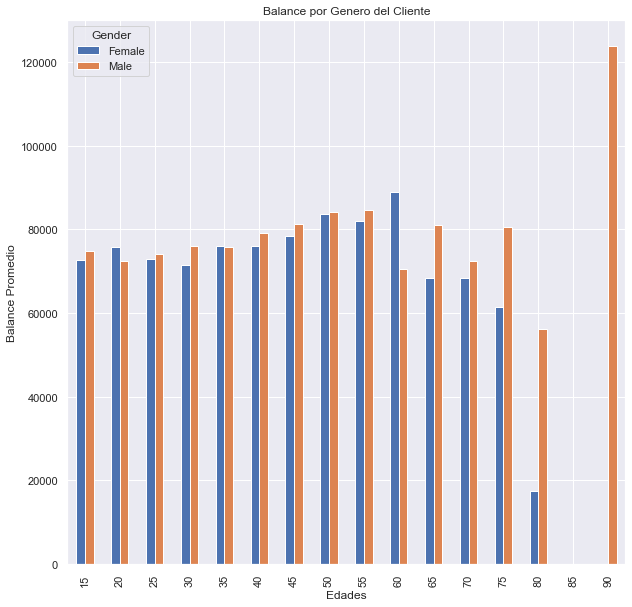

In [86]:
round(df1.pivot_table( 'Balance' ,index= 'age_range', columns= 'Gender', aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar' ) 
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Balance por Genero del Cliente")
plt.ylabel("Balance Promedio")
plt.xlabel("Edades")
plt.show()

### Queremos saber en relación a la caracteristica de **Exited** si el cliente deja o no deja el banco

0 = No
1= sí

In [90]:
df.groupby('Exited').size()

Exited
0    7963
1    2037
dtype: int64

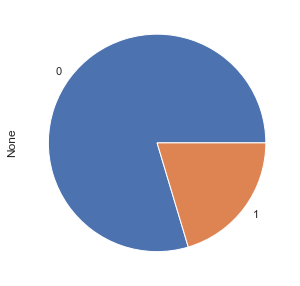

In [92]:
df.groupby('Exited').size().plot(kind = 'pie')
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

In [89]:
round(df1.pivot_table( 'Balance' ,index= 'age_range', columns= 'Exited', aggfunc= 'mean',fill_value=0),2)

Exited,0,1
age_range,,
15,77430.52,27831.70
20,72209.78,91701.09
25,71035.90,106809.97
30,72579.60,90018.70
35,73556.95,92060.14
40,73460.94,91389.45
45,72460.16,89494.22
50,75343.96,90360.27
55,77470.31,88041.50


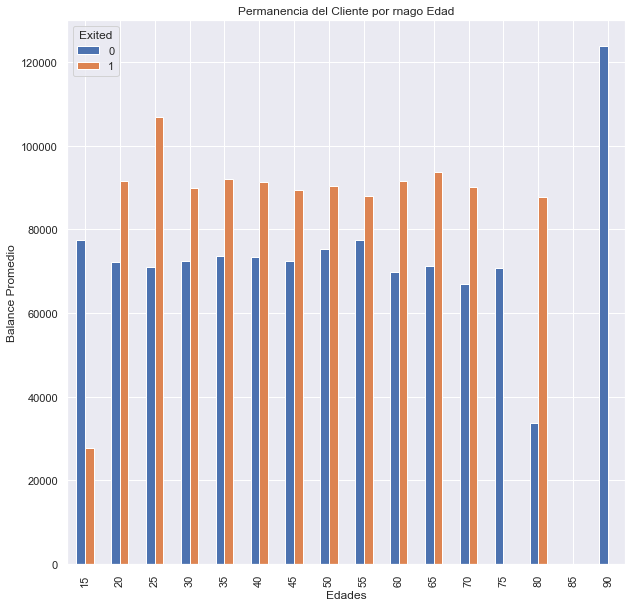

In [94]:
round(df1.pivot_table( 'Balance' ,index= 'age_range', columns= 'Exited', aggfunc= 'mean',fill_value=0),2).plot(kind = 'bar' ) 
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Permanencia del Cliente por rnago Edad")
plt.ylabel("Balance Promedio")
plt.xlabel("Edades")
plt.show()

*según el grafico anterior se obseva que aquellos que cean en la categoria de Exited - abanonan o salen- mantienen*
*un monto menor en Balance que aquellos que sí permanecen, en los clientes con edades entre 20 a 75 años*

### Histogramas

**Credit Score**

En esta caracteristica se obserba que la mayoria de los clientes se acumulan entre 600 y 700

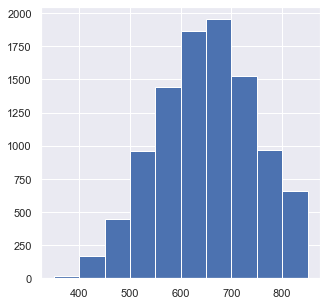

In [34]:
df['CreditScore'].hist();
sns.set(rc={'figure.figsize':(5,5)})

**Age**

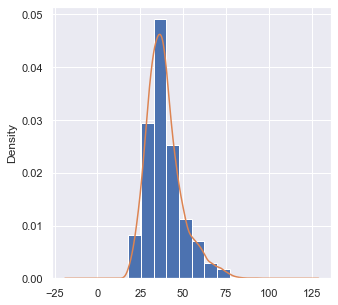

In [36]:
ax = df.Age.plot.hist(density=True)
df.Age.plot.density(ax=ax); 

se observa una gran cantidad de clientes entre las edades de 25 a 35 años

### Boxplots

Se procede a realizar los respectivos boxplots para observar los datos 

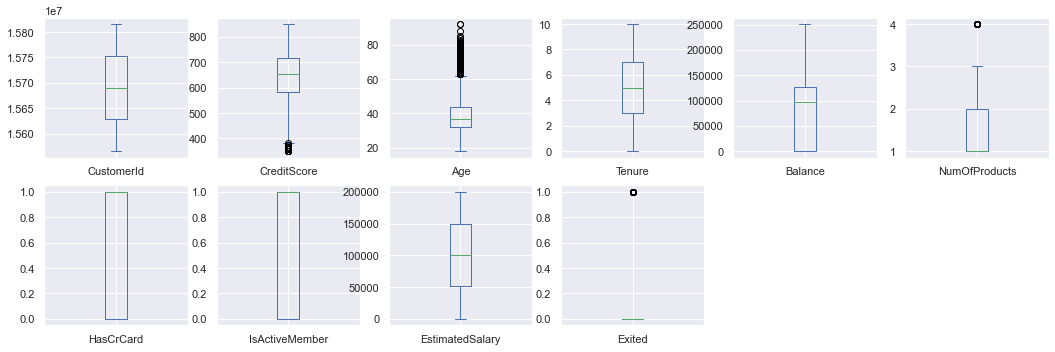

In [26]:
df.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show() # Representación de las caracteristicas como vienen en el daset

In [27]:
# se observa valores extremos "outliers" en la Edd de los clientes así como en el Credit Score, y unos cuantos en
# numero de productos

### Mapas de Calor de Correlación


Se procede a generar la tabla de correlaciones así como la gráfica correspondiente

In [43]:
cor_matrix = df.corr().abs()   # esta versión permite colorear aquellas correlaciones que nos llaman la atención tanto positivas como negativas
cor_matrix.style.background_gradient(sns.light_palette('red', as_cmap=True))

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,0.014883,0.012419,0.016972,0.014025,0.001665,0.015271,0.006248
CreditScore,0.005308,1.000000,0.003965,0.000842,0.006268,0.012238,0.005458,0.025651,0.001384,0.027094
Age,0.009497,0.003965,1.000000,0.009997,0.028308,0.030680,0.011721,0.085472,0.007201,0.285323
Tenure,0.014883,0.000842,0.009997,1.000000,0.012254,0.013444,0.022583,0.028362,0.007784,0.014001
Balance,0.012419,0.006268,0.028308,0.012254,1.000000,0.304180,0.014858,0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,0.030680,0.013444,0.304180,1.000000,0.003183,0.009612,0.014204,0.047820
HasCrCard,0.014025,0.005458,0.011721,0.022583,0.014858,0.003183,1.000000,0.011866,0.009933,0.007138
IsActiveMember,0.001665,0.025651,0.085472,0.028362,0.010084,0.009612,0.011866,1.000000,0.011421,0.156128
EstimatedSalary,0.015271,0.001384,0.007201,0.007784,0.012797,0.014204,0.009933,0.011421,1.000000,0.012097
Exited,0.006248,0.027094,0.285323,0.014001,0.118533,0.047820,0.007138,0.156128,0.012097,1.000000


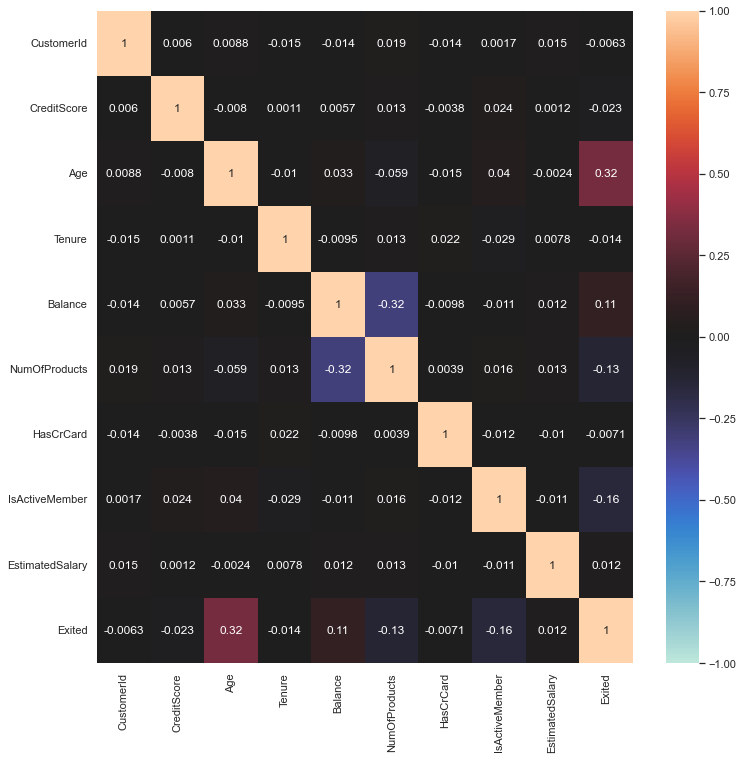

In [45]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()

### Según lo observado anteriormente existe relacion entre Edad y Exited, ademas una relacion negativa entre Numofproduct y Balance

### II- Probabilidad

Según lo visto en el curso, cuando se tiene un datset y no se sabe que cual distribucion aplicar 
entonces se procede a **Determinar la distribucion de Probabilidad de mis Datos**

In [46]:
# primero ver rapidamente el dataset 
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [47]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [48]:
df.isna().sum() # no se presentan valores nulos

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

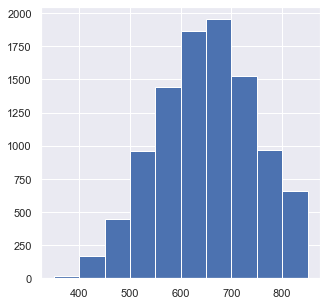

In [49]:
#Revisar la distribucion del CreditScore
df['CreditScore'].hist();

In [50]:
# se crea una funcion para estandarizar los datos y quitar los valores nulos y extremos
# esta funcion permite escalar los datos y definir la variable Y o variable de interes

def standarise(column,pct,pct_lower):
    sc = StandardScaler()
    y =df[column][df[column].notnull()].to_list()
    y.sort()
    len_y= len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy =([[x] for x in y])
    sc.fit(yy)
    y_std = sc.transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y

In [51]:
# se define la funcion pada probar diferentes distribuciones de probabilidad
def fit_distribution(column,pct,pct_lower):
    # se setean las distribuciones a usar
    # ver docs.scipy.org/doc/scipy/reference/stats.html para mas informacion
    y_std,size,y_org = standarise(column,pct,pct_lower)
    dist_names= ['weibull_min','norm', 'weibull_max','beta','invgauss','uniform','gamma','expon','lognorm','pearson3','triang']
    
    
    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins = percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)
    
    # se itera sobre as diferentes distribuciones
    
    for distribution in dist_names:
        # se setean las y se obtiene los paraetros 
        dist= getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
              
        # se obtienen los rangos por percentiles
        # se obtienen los valores acumulados
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range (len(percentile_bins)-1):
              expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
              expected_frequency.append(expected_cdf_area)
              
        # se calcula el estadistico Chi-Cuadrado
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss= np.round(sum(((cum_expected_frequency - cum_observed_frequency)**2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)
              
    ## se ordenan los datos
    results= pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(('chi_square'), inplace=True)
        
        
    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print(results)

In [52]:
fit_distribution('CreditScore',0.99,0.01) # la funcion procede a realizar la evaluacion para cada moledelo de distribucion
                                            # de probabilidad e imprime los resultados ordenados de menor a mayor segun valor
                                            # entre menor sea el valor indica que se acerca más a la variable elegida

(3.3285396341562863, -2.9846724935372375, 3.3291140997192032)

(-1.3920837272034615e-16, 1.0)

(3.1924438278961143, 2.8770205153872594, 3.2153838826085765)

(2.74568621583935, 2.6541553500478186, -2.5919287165487788, 5.09923848766706)

(0.020976832734344808, -7.118980541754407, 339.1517900125624)

(-2.370256733714423, 4.525249289714061)

(17304.31861288433, -131.57868216302228, 0.0076037980097054154)

(-2.370256733714423, 2.370256733714423)

(0.011887008739443393, -84.16914030181186, 84.16540820752195)

(-0.027410050056180177, -1.8873344802339995e-16, 1.0000218859877943)

(0.5177207363544292, -2.4626878834003243, 4.862549539328729)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
10       triang         3.0
3          beta        17.0
0   weibull_min        32.0
2   weibull_max        56.0
6         gamma        80.0
8       lognorm        81.0
1          norm        83.0
9      pearson3        86.0
4      invgauss   

según lo anterior el modelo a utilizar corresponde a **Triang** según la Triang corresponde a Una distribución triangular es una distribución continua que se describe por sus valores mínimos, máximos y su moda.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html

In [53]:
# se estandariza la variable
y_std, len_y,y = standarise('CreditScore',0.99,0.01)

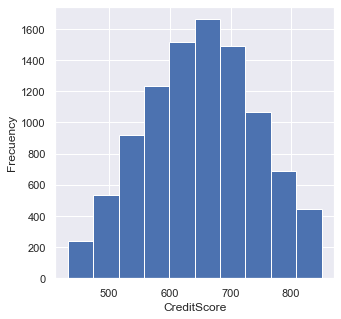

In [55]:
plt.hist(y)
plt.xlabel('CreditScore')
plt.ylabel('Frecuency');

*Se puede obsevar como ahora el histograma se asemeja un poco más a un triangulo* mejora la districución de datos

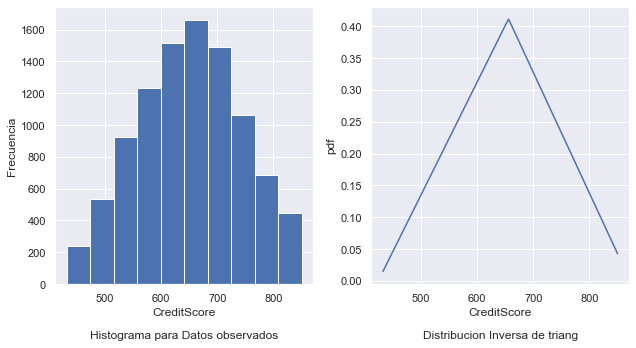

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
axes[0].hist(y)
axes[0].set_xlabel('CreditScore\n\nHistograma para Datos observados')
axes[0].set_ylabel('Frecuencia')
axes[1].plot(y,triang.pdf(y_std,0.517,-2.462,4.862))
axes[1].set_xlabel('CreditScore\n\nDistribucion Inversa de triang')
axes[1].set_ylabel('pdf')
fig.tight_layout()

En lo personal este metodo me gustó mucho porque permite conocer cual metodo permite de mejor forma adaptarse a los datos.  segun se puede ver en la grafica anterior el comportamiento de los datos ya ajustado y normalizado se comporta muy similar a la Distribucion inversa de Triang.

### Aplicar el tema de Distribución Hipergeométrica

In [100]:
df.groupby('Exited').size()

Exited
0    7963
1    2037
dtype: int64

In [101]:
7963/10000

0.7963

In [102]:
2037/10000

0.2037

In [103]:
# suponga que del total de clientes, se tomó una muestra que representa la misma
# proporcion de la poblacion (caso hipoteticoi) quiere elegir si a sido de los que dejan o no el banco
# quiere saber si del total y elige un cliente que sea de los que sí caen en categoria exited 

N_clientes = 100 # poblacion total de clientes
r_clientes = 80 # numero de clientes que no dejan el banco
n_clientes = 20 # numero de clientes que sí dejan

distr_hyper_clientes = ss.hypergeom(N_clientes, r_clientes, n_clientes)

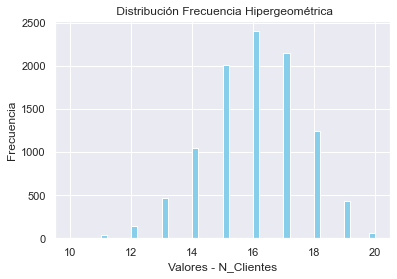

In [104]:
# se grafica la distribucion segun los datos anteriores

data_hyper = ss.hypergeom.rvs(N_clientes, r_clientes, n_clientes,size =10000)

ax = sns.distplot(data_hyper,
                 kde = False,
                 color= "skyblue",
                 hist_kws={"linewidth":1,"alpha":1})
ax.set(xlabel = "Valores - N_Clientes", ylabel = "Frecuencia", title= " Distribución Frecuencia Hipergeométrica");

In [107]:
x_cliente =16 
prob_cliente =distr_hyper_clientes.pmf(x_cliente)
prob_cliente

0.24368774963840795

## III- Estadistica Inferencial

In [108]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [116]:
df.groupby('Gender').size()

Gender
Female    4543
Male      5457
dtype: int64

In [117]:
df.groupby('Exited').size()

Exited
0    7963
1    2037
dtype: int64

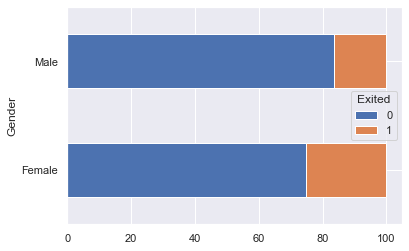

In [111]:
#crear un grafico barras de 100%
grafico= pd.crosstab(df.Gender,df.Exited)
grafico_porcentuales= grafico.apply(lambda x: (x*100)/sum(x),axis=1)
grafico_porcentuales.plot.barh(stacked=True);

analisis = df.loc[df['Exited'].isin([0,1]),['Gender','Exited']]
analisis.head()

In [115]:
#definir una funcion para permutaciones 

def permutation_sample(data1,data2):
    """Genera una muestra permutada a partir de dos conjuntos de datos"""
    
    #concatenar los conjuntos de datos: data
    data = np.concatenate((data1,data2))
    
    
    #permutar el arreflo concatenado: datos permutados
    permuted_data = np.random.permutation(data)
    
    #dividir el arreglo permutado en dos
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1,perm_sample_2

In [118]:
# Generate Permutation samples

perm_sample_1,perm_sample_2 = permutation_sample(
                                df.loc[df['Gender']=='Male',['Exited']],
                                df.loc[df['Gender']=='Female',['Exited']])

In [119]:
print(perm_sample_1)

[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [120]:
print(perm_sample_2)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [129]:
### Se crea la funcion para la diferencia de proporciones

def diff_of_props(data_1,data_2,value):
    """Diferencia entre los promedios de dos arreglos"""
    
    
    # Se calcula la diferencia entre las proporciones de datos 1 y datos 2: diff
    
    diff = np.mean(data_1[:,0]==value) - np.mean(data_2[:,0]==value)
    
    return diff

In [130]:
# Generar la diferencia empírica (son los resultados segun la muestra que se obtiene)

diff_empiricas_prop = diff_of_props(perm_sample_1,perm_sample_2,1)

In [131]:
diff_empiricas_prop 

0.0041987159047193745

In [132]:
### Se generan las replicas de las permutaciones

#esta funcion recibe otra funcion (una funcion dentro de ota funcion)
def draw_perm_reps(data_1,data_2,func,value,size=1,prop=0): 
    """Multiles repeticiones permutadas"""
    
    #Inicializar un arreglo (un tipo de matriz) de repeticines : perm_replicates
    perm_replicates = np.empty(size)
    
    for i in range(size):
        # Se genera la muestra permutada 
        perm_sample_1,perm_sample_2 = permutation_sample(data_1,data_2)
        
        #computar el estadistico de prueba
        if prop == 0:
            perm_replicates[i]= func(perm_sample_1,perm_sample_2)
        elif prop ==1:
            perm_replicates[i]= func(perm_sample_1,perm_sample_2,value)
    
    return perm_replicates

In [133]:
# se generan 10 000 permutaciones o replicas : perm_replicates
perm_replicates = draw_perm_reps(df.loc[df['Gender'] == 'Male',['Exited']],
                                df.loc[df['Gender'] == 'Female',['Exited']],
                                diff_of_props, value= 1, size = 10000, prop =1)

Hipotesis nula dice : indica que la proporcion de hombres y mujeres es la misma que permanecen o no en el banco

In [134]:
# Se procede a calcular el valor P

p = np.sum(abs(perm_replicates) >= abs(diff_empiricas_prop)) / len(perm_replicates)

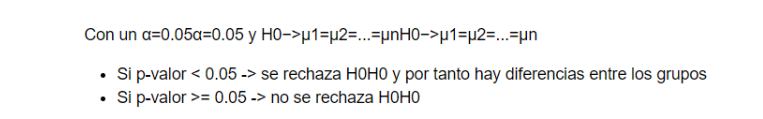

In [135]:
print('p-value =', p) 

p-value = 0.618


**como el valor de P  dio mayor a 0.05 existe evidencia estadistica para no**
    **rechazar la hipotesis nula**

## Grafica de la Region Critica

In [136]:
# se inicia creando unos objetos 

# Probar diferentes niveles de confianza

nvl_95 = np.percentile(perm_replicates,95)
nvl_975 = np.percentile(perm_replicates,97.5)
nvl_995 = np.percentile(perm_replicates,99.5)


nvl_5 = np.percentile(perm_replicates,5)
nvl_275 = np.percentile(perm_replicates,2.5)
nvl_005 = np.percentile(perm_replicates,0.5)

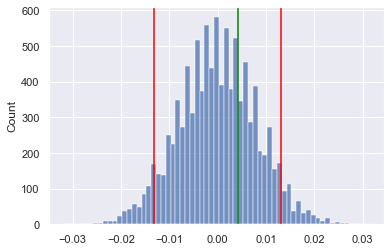

In [137]:
# Graficar para un 90% de comfianza
sns.histplot(data=perm_replicates)
plt.axvline(diff_empiricas_prop, c="green")
plt.axvline(nvl_95, c="red")  # esto corresponde a las colas
plt.axvline(nvl_5, c="red");   # esto corresponde a las colas